# ship type pred

In [55]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('AIS.csv', low_memory=False)

# Filter out rows where Callsign is 'unknown'
df = df[df['Callsign'] != 'unknown']

# Convert timestamp to datetime and extract features (hour, day, etc.)
df['Timestamp'] = pd.to_datetime(df['# Timestamp'], format='%d/%m/%Y %H:%M:%S')
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

# Drop rows with missing values in important columns
df = df.dropna(subset=['SOG', 'Ship type'])


In [56]:
df

,Unnamed: 0,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,...,ETA,Data source type,A,B,C,D,Timestamp,Hour,DayOfWeek,Month
0,32,01/11/2024 00:00:00,Class A,219000429,54.654167,11.350667,Under way using engine,0.0,0.4,33.2,...,NaN,AIS,NaN,NaN,NaN,NaN,2024-11-01 00:00:00,0,4,11
1,34,01/11/2024 00:00:00,Class A,219000429,54.654167,11.350667,Under way using engine,0.0,0.4,33.2,...,NaN,AIS,NaN,NaN,NaN,NaN,2024-11-01 00:00:00,0,4,11
2,743,01/11/2024 00:00:03,Class A,211188000,54.599917,11.287717,Under way using engine,1.1,16.2,202.6,...,NaN,AIS,NaN,NaN,NaN,NaN,2024-11-01 00:00:03,0,4,11
3,788,01/11/2024 00:00:03,Class A,219000431,54.506467,11.231333,Under way using engine,25.7,10.2,213.4,...,NaN,AIS,NaN,NaN,NaN,NaN,2024-11-01 00:00:03,0,4,11
4,791,01/11/2024 00:00:03,Class A,219000431,54.506467,11.231333,Under way using engine,25.7,10.2,213.4,...,NaN,AIS,NaN,NaN,NaN,NaN,2024-11-01 00:00:03,0,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354809,16995459,04/11/2024 23:59:53,Class A,211188000,54.606033,11.293117,Under way using engine,0.0,13.4,204.8,...,31/12/2024 12:00:00,AIS,17.0,124.0,12.0,12.0,2024-11-04 23:59:53,23,0,11
354810,16995460,04/11/2024 23:59:53,Class A,211188000,54.606033,11.293117,Under way using engine,0.0,13.4,204.8,...,31/12/2024 12:00:00,AIS,17.0,124.0,12.0,12.0,2024-11-04 23:59:53,23,0,11
354811,16995461,04/11/2024 23:59:53,Class A,211188000,54.606033,11.293117,Under way using engine,0.0,13.4,204.8,...,31/12/2024 12:00:00,AIS,17.0,124.0,12.0,12.0,2024-11-04 23:59:53,23,0,11
354812,16996321,04/11/2024 23:59:58,Class A,219000431,54.652917,11.350267,Under way using engine,0.0,0.0,192.8,...,31/12/2024 00:00:00,AIS,23.0,119.0,13.0,13.0,2024-11-04 23:59:58,23,0,11


Accuracy: 0.9980130490537322
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70816
           1       0.55      0.24      0.33       147

    accuracy                           1.00     70963
   macro avg       0.77      0.62      0.67     70963
weighted avg       1.00      1.00      1.00     70963

Confusion Matrix:
[[70787    29]
 [  112    35]]


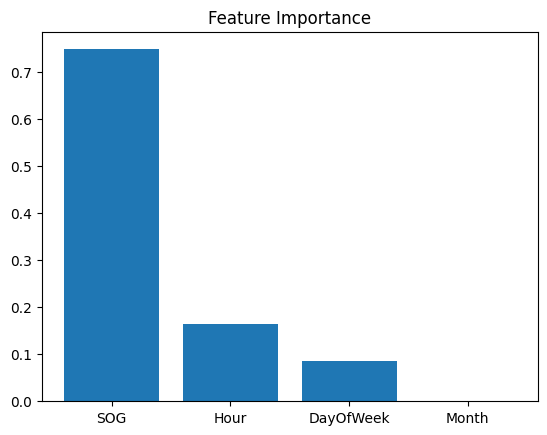

In [57]:

# Feature and Target Selection
X = df[['SOG', 'Hour', 'DayOfWeek', 'Month']]  # Features
y = df['Ship type']  # Target

# Encode target variable (Cargo type)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize features (especially SOG)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

# Feature importance (optional)
import matplotlib.pyplot as plt
features = ['SOG', 'Hour', 'DayOfWeek', 'Month']
feature_importances = model.feature_importances_
plt.bar(features, feature_importances)
plt.title("Feature Importance")
plt.show()


In [58]:
unique_ship_types = df['Ship type'].unique()
print(unique_ship_types)

['Undefined' 'Passenger']


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the CSV file
data = pd.read_csv('AIS.csv', low_memory=False)

# Step 1: Skip rows where Callsign is unknown
# Assuming 'Callsign' column contains 'unknown' or NaN for unknown values
data = data[data['Callsign'].notna() & (data['Callsign'] != 'unknown')]

# Step 2: Feature selection (ROT, SOG, COG, Heading)
features = ['ROT', 'SOG', 'COG','Heading' ]
X = data[features]

# Step 3: Handle missing values for features (mean imputation)
X = X.fillna(X.mean())

# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Target variable (Ship Type)
y = data['Ship type']

# Convert Ship Type to numerical values (label encoding)
y = pd.factorize(y)[0]  # Alternatively, use pd.get_dummies for one-hot encoding

# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Initialize and train the model (Random Forest Classifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = clf.predict(X_test)

# Step 9: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       147
           1       1.00      1.00      1.00     70816

    accuracy                           1.00     70963
   macro avg       0.98      0.94      0.96     70963
weighted avg       1.00      1.00      1.00     70963

Confusion Matrix:
[[  130    17]
 [    6 70810]]
